In [1]:
%matplotlib inline
import numpy as np
from scipy.misc import factorial2
from scipy.special import factorial
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct

In [2]:
# In this notebook, I am attempting to solve the Classical Moment Problem starting from a Gaussian
# with moments s_n = (n-1)!! for n even

In [45]:
def c_real(k,N,tol):
    last_term = -k**2/2
    sum = last_term/np.sqrt(2)
    n = 2.0
    while np.abs(last_term) > tol:
        n = n + 2.0
        last_term = -last_term*k**2/n/(n-1.0)
        sum += last_term/np.sqrt(n)
    print(n)
    return 1+ np.sqrt(np.pi/2)*N*sum

def c_imag(k,N,tol):
    last_term = k
    sum = last_term
    n = 1.0
    while np.abs(last_term) > tol:
        n = n + 2.0
        last_term = -last_term*k**2/n/(n-1.0)
        sum += last_term/np.sqrt(n)
    return np.sqrt(np.pi/2)*N*sum

In [11]:
print(c_real(1,1,1e-5))

10
0.398753879688


In [28]:
# here we define two functions. c(k,N) is the characteristic function for FCS
# we also define g(k) which is the characteristic function for a Gaussian for testing that everything works
n_max=80
n = np.arange(1,n_max+1)
factors = (1j)**n/factorial(n)/np.sqrt(n)
#print(n)
#print(factors)

def c(k,N):
    km = np.tile(k,(n_max,1))
    tosum = factors*np.power(km.T,n)
    return 1+np.sqrt(np.pi/2)*N*np.sum(tosum,axis=1)

gn = n - 1
gfactors = (-1)**(gn)/factorial(gn)
print(gfactors)
def g(k):
    km = np.tile(k,(n_max,1))
    tosum = gfactors*np.power(km.T,2*gn)
    return np.sum(tosum,axis=1)


[  1.00000000e+000  -1.00000000e+000   5.00000000e-001  -1.66666667e-001
   4.16666667e-002  -8.33333333e-003   1.38888889e-003  -1.98412698e-004
   2.48015873e-005  -2.75573192e-006   2.75573192e-007  -2.50521084e-008
   2.08767570e-009  -1.60590438e-010   1.14707456e-011  -7.64716373e-013
   4.77947733e-014  -2.81145725e-015   1.56192070e-016  -8.22063525e-018
   4.11031762e-019  -1.95729411e-020   8.89679139e-022  -3.86817017e-023
   1.61173757e-024  -6.44695028e-026   2.47959626e-027  -9.18368986e-029
   3.27988924e-030  -1.13099629e-031   3.76998763e-033  -1.21612504e-034
   3.80039075e-036  -1.15163356e-037   3.38715754e-039  -9.67759296e-041
   2.68822027e-042  -7.26546018e-044   1.91196321e-045  -4.90246976e-047
   1.22561744e-048  -2.98931083e-050   7.11740673e-052  -1.65521087e-053
   3.76184288e-055  -8.35965085e-057   1.81731540e-058  -3.86662851e-060
   8.05547607e-062  -1.64397471e-063   3.28794942e-065  -6.44695964e-067
   1.23979993e-068  -2.33924515e-070   4.33193547e-

1.25331413732


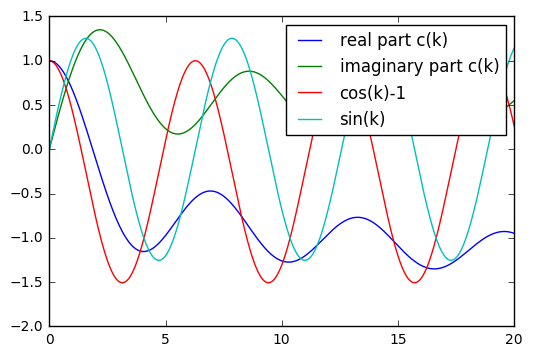

In [5]:
k = np.linspace(0,20,1025)
cf = c(k,np.sqrt(2/np.pi))
plt.plot(k,np.real(cf), label="real part c(k)")
plt.plot(k,np.imag(cf),label="imaginary part c(k)")
plt.plot(k,1+np.sqrt(np.pi/2)*(np.cos(k)-1),label="cos(k)-1")
plt.plot(k,np.sqrt(np.pi/2)*np.sin(k),label="sin(k)")
plt.legend()
print(np.sqrt(np.pi/2))

2.0
6.0
6.0
6.0
8.0
8.0
8.0
8.0
8.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
14.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
18.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
20.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
26.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
32.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
34.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
38.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
40.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
42.0
44.0
44.0
44.0
44.0
44.0
44.0
44.0
44.0
44.0
44.0

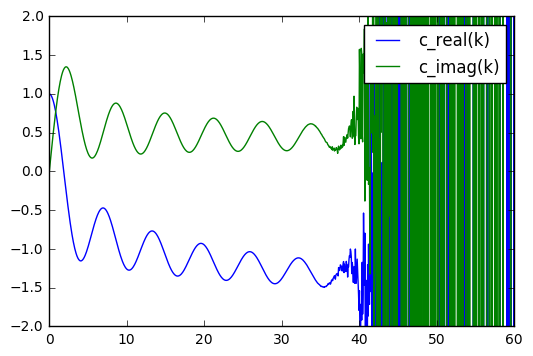

In [46]:
k = np.linspace(0,60,1025)

cr = np.array([c_real(x,np.sqrt(2/np.pi),1e-7) for x in k])
ci = np.array([c_imag(x,np.sqrt(2/np.pi),1e-7) for x in k])

plt.plot(k,cr, label="c_real(k)")
plt.plot(k,ci,label="c_imag(k)")
plt.ylim((-2,2))
plt.legend()

2048


(0, 50)

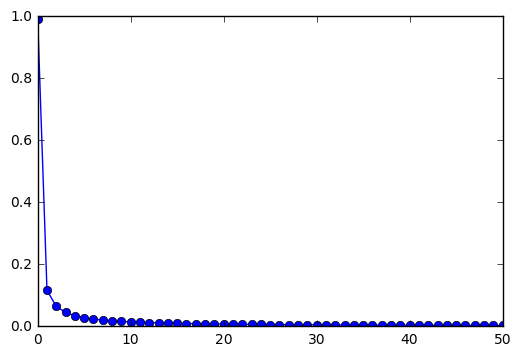

In [30]:
# need to find the proper way of doing an fft
cf_fft = np.fft.irfft(cr+1j*ci)
print(cf_fft.size)
plt.plot(abs(cf_fft),"o-")
plt.xlim((0,50))
#plt.ylim((-.2,.2))

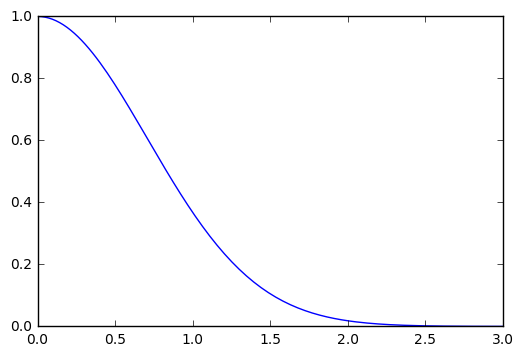

In [7]:
gk = np.linspace(0,3,128)
gauss = g(gk)
plt.plot(gk,gauss)

254


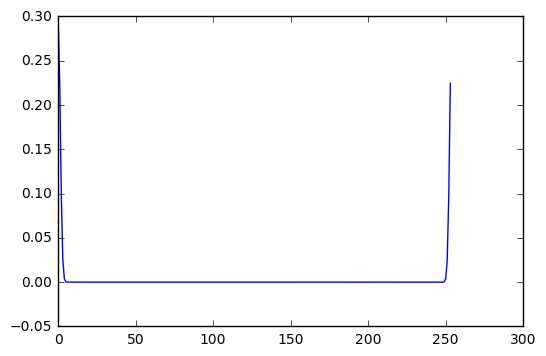

In [8]:
gauss_fft = np.fft.irfft(gauss)
print(gauss_fft.size)
plt.plot(np.real(gauss_fft))